In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/log2.csv')
df.head(4)
# df.info()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7


In [ ]:
x = df.drop('Action',axis = 1)
y = df.Action.copy()

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
cls = RandomForestClassifier(max_depth = 2, random_state= 0)

In [ ]:
cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns

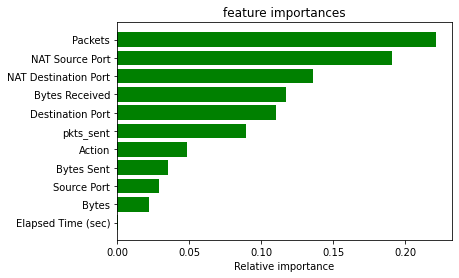

In [ ]:
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices],color = 'g', align= 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
class_names = ['drop','allow','deny','reset-both']

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


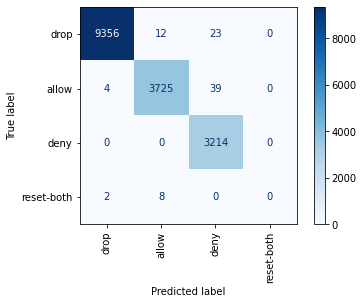

In [ ]:
disp = plot_confusion_matrix(cls, x_test,y_test,display_labels = class_names, cmap = plt.cm.Blues,xticks_rotation='vertical' )

In [ ]:
y.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(x)
print(shap_values)

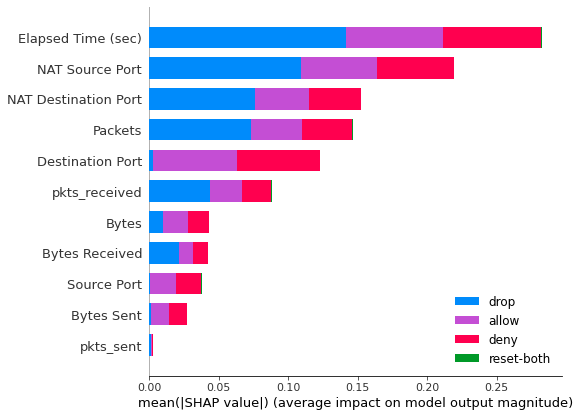

In [ ]:
shap.summary_plot(shap_values,x.values,plot_type = "bar",class_names = class_names, feature_names = x.columns)

### summary_plot for the specific calss

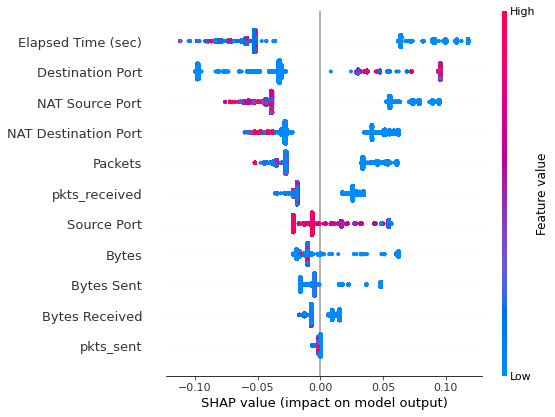

In [ ]:
shap.summary_plot(shap_values[1], x.values, feature_names = x.columns)

## froce plot

In [ ]:
shap.initjs()

i = 8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], x.values[i], feature_names = x.columns)

### shap water fall

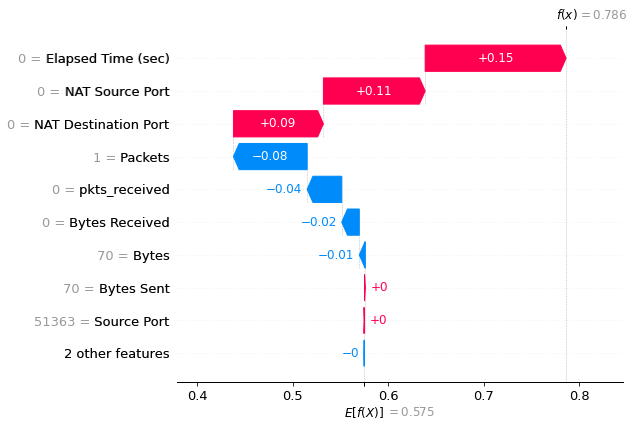

In [ ]:
row = 8

shap.waterfall_plot(shap.Explanation(values = shap_values[0]
                                     
[row], base_values = explainer.expected_value[0],data = x_test.iloc[row],feature_names = x_test.columns.tolist()))

# shap.waterfall_plot(shap.explanation(values.expected_value[0], shap_values[0][i], x.values[i], feature_names = x.columns)

## as the time pass the influence may vary >>>>>>>>>>>>>> buid relation ship between feature, class or instance